# Temperature

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

import sys
sys.path.append( './helper/' )
from XperimentPlotter import XperimentPlotter
from Thermometer import Thermometer
from Colormap import Colormap

2024-01-23 16:29:21.862752: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 16:29:21.895063: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 16:29:21.895098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 16:29:21.896107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 16:29:21.901462: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 16:29:21.902193: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['text.usetex'] = True
fontsize = 12
baseFigurePath = './tmp/figures'

## Figure 4.12

In [3]:
startDate = '2023-08-25 13:00'
endDate = '2023-10-17 10:30'

path = '../data/temps/'
# get the two temperature measurements
path_room = f'{path}/localtemperature.log'
path_monitor = f'{path}/viewpixxII-temperature.log'
room_t = Thermometer.ReadRoomTemperature(path_room, daterange=(startDate, endDate))
room_t = room_t[room_t.temperature < 85.0]
monitor_t = Thermometer.ReadViewpixxTemperature(path_monitor, daterange=(startDate, endDate))

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx


/tmp/ipykernel_140315/2292657084.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


                datetime    t0    t1    t2    t3    t4    t5    t6    t7
8267 2023-09-04 13:34:19  25.0  25.0  25.0  25.0  24.0  25.0  25.0  25.0
8268 2023-09-04 13:36:01  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0
8269 2023-09-04 13:38:01  27.0  27.0  27.0  27.0  27.0  27.0  28.0  27.0
8270 2023-09-04 13:40:01  30.0  29.0  29.0  29.0  29.0  29.0  30.0  29.0
8271 2023-09-04 13:42:01  32.0  32.0  31.0  31.0  31.0  31.0  32.0  31.0
...                  ...   ...   ...   ...   ...   ...   ...   ...   ...
8338 2023-09-04 15:56:01  39.0  41.0  39.0  41.0  39.0  41.0  39.0  40.0
8339 2023-09-04 15:58:01  39.0  41.0  39.0  41.0  39.0  41.0  39.0  40.0
8340 2023-09-04 16:00:01  39.0  41.0  39.0  41.0  39.0  41.0  39.0  40.0
8341 2023-09-04 16:02:01  39.0  41.0  39.0  41.0  39.0  41.0  39.0  40.0
8342 2023-09-04 16:04:01  39.0  41.0  39.0  41.0  39.0  41.0  39.0  40.0

[76 rows x 9 columns]
                datetime  temperature
6997 2023-09-04 13:34:00      23.7500
6998 2023-09-04 13:36:00 

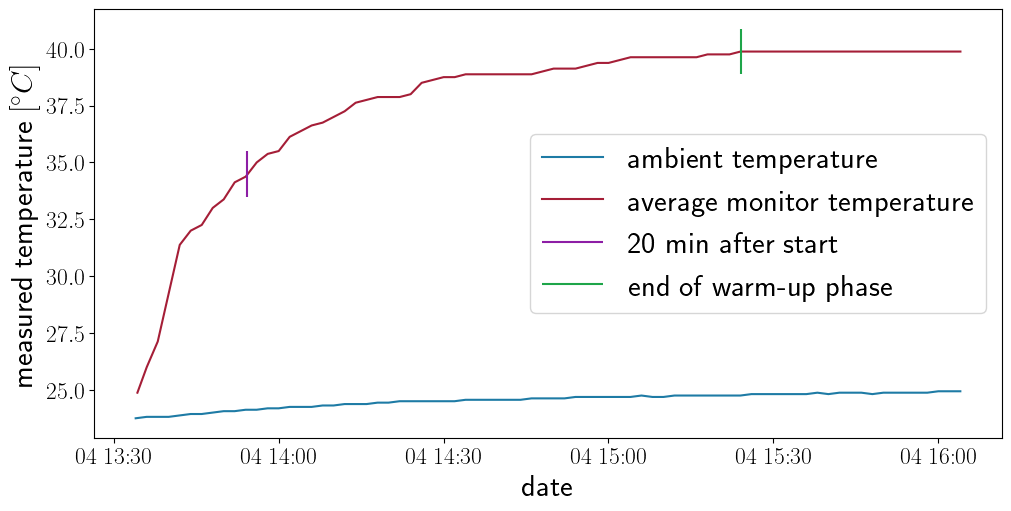

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize=22

startDate_warmup = '2023-09-04 13:00'
endDate_warmup = '2023-09-04 17:03'

monitor_t_warmup = monitor_t[monitor_t['datetime'] > startDate_warmup]
monitor_t_warmup = monitor_t_warmup[monitor_t_warmup['datetime'] < endDate_warmup]

room_t_warmup = room_t[room_t['datetime'] > startDate_warmup]
room_t_warmup = room_t_warmup[room_t_warmup['datetime'] < endDate_warmup]

axes.plot(room_t_warmup['datetime'], room_t_warmup['temperature'], label='ambient temperature', color=Colormap.blue)
axes.plot(monitor_t_warmup['datetime'], (monitor_t_warmup.loc[:, monitor_t_warmup.columns != 'datetime']).mean(axis=1), label='average monitor temperature', color=Colormap.red)
max_monitor = (monitor_t_warmup.loc[:, monitor_t_warmup.columns != 'datetime']).mean(axis=1).max()
max_row_index = (monitor_t_warmup
                 .loc[:, monitor_t_warmup.columns != 'datetime']
                 .mean(axis=1)
                 .idxmax())

cap_found = monitor_t_warmup.loc[max_row_index, 'datetime']
axes.vlines(monitor_t_warmup.iloc[0]["datetime"]+timedelta(minutes=20), ymin= 34.5-1, ymax=34.5+1, colors=[Colormap.magenta], label=f'20 min after start')
axes.vlines(cap_found, ymin= max_monitor-1, ymax=max_monitor+1, colors=[Colormap.green], label=f'end of warm-up phase')

axes.set_xlabel('date', fontsize=fontsize)
axes.set_ylabel(r'measured temperature $\left[^{\circ}C\right]$', fontsize=fontsize)

for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-5)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-5)

axes.legend(fontsize=fontsize)
figurePath = f'{baseFigurePath}/03_03Temperature/WarmUpAnalysis.png'
fig.show()
fig.savefig(figurePath, dpi=300)
print(monitor_t_warmup)
print(room_t_warmup)

## Figure 4.13

In [5]:
path = '../data/014tempDependency3'
data = []

startingdate_str = '2023-08-09 09:40:23'
startingdate = datetime.strptime(startingdate_str, '%Y-%m-%d %H:%M:%S')
duration = 144 #sec
for i in range(1,51):
    data.append(XperimentPlotter.ReadData(f'{path}/Test{i:02}/', f'014 Test{i} (sc, ascending)', [(startingdate + timedelta(seconds=duration*i)).strftime('%Y-%m-%d %H:%M'), (startingdate + timedelta(seconds=duration*(i+1))).strftime('%Y-%m-%d %H:%M')]))

path_temps = f'../data/temps/'

mergedDataTemps = []
for d in data:
    mergedDataTemps.append(XperimentPlotter.mergeTempsInData(d, path_temps))

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '28.8125' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = row.temps
/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:171: FutureWarning: 

/tmp/ipykernel_140315/3777258569.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


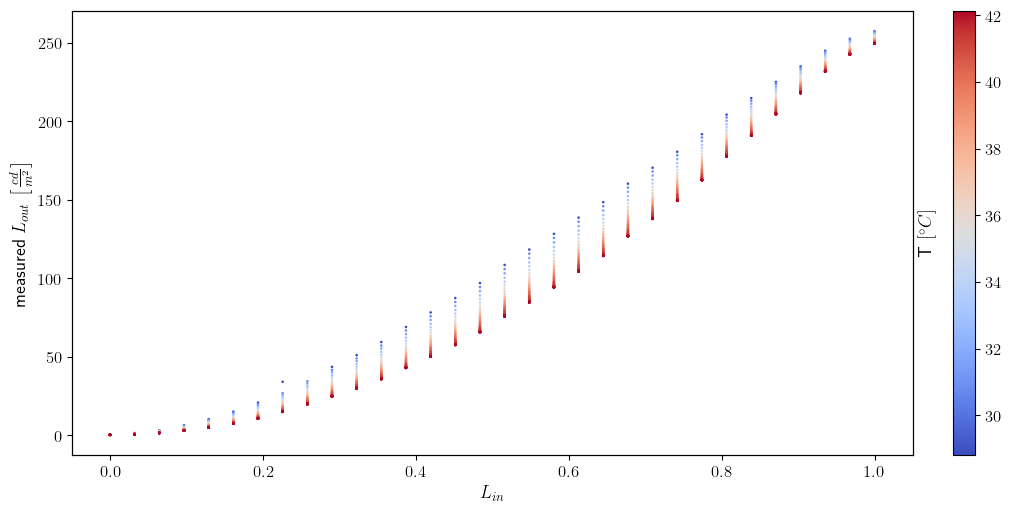

In [6]:
fontsize = 13

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')

list_dataframes = []
for d in mergedDataTemps:
    list_dataframes.append(d.dataframe)

concat = pd.concat(list_dataframes)

pcm = axes.scatter(concat['levels'], concat['mean'], marker='.', s=3, c=concat['temps'], cmap='coolwarm')

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# set label for colorbar
ax2 = axes.twinx()
ax2.set_yticks([])
ax2.set_ylabel(r'T $\left[^{\circ}C\right]$', fontsize=fontsize)

colorbar = fig.colorbar(pcm, pad=0.02)
for tick_label in colorbar.ax.get_yticklabels():
    tick_label.set_fontsize(fontsize-1)

figurePath = f'{baseFigurePath}/03_03Temperature/profileVPIXXFranz.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figure 4.14

max Temp: 42.125
min Temp: 30.875
49

max diff [cd/m^2]: 0.0
max diff [cd/m^2]: 2.7854980000001746
max diff [cd/m^2]: 12.661392000000191
max diff [cd/m^2]: 22.827959000000106
max diff [cd/m^2]: 29.61261200000014
max diff [cd/m^2]: 31.69523300000006
cd where max: 136.13027800000012


/tmp/ipykernel_140315/3406602758.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


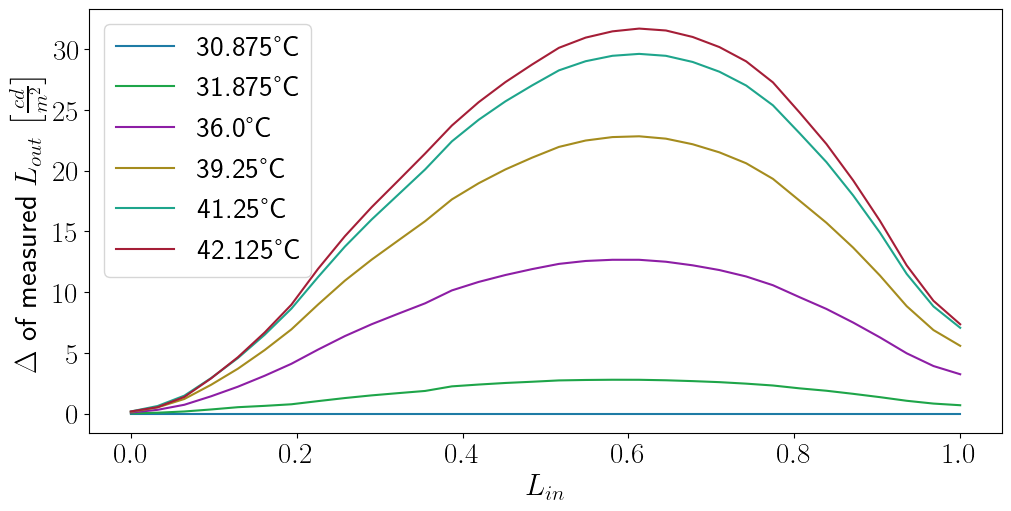

In [7]:
maxTemp = 0
minTemp = 9999999

for d in mergedDataTemps[1:]:
    dmax = d.dataframe['temps'].max()
    dmin = d.dataframe['temps'].min()
    if dmax >= maxTemp:
        maxTemp = dmax
    if dmin <= minTemp:
        minTemp = dmin
print(f'max Temp: {maxTemp}')
print(f'min Temp: {minTemp}')

print(len(mergedDataTemps[1:]))
print()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize=22
df_cold = mergedDataTemps[1].dataframe

df_warm = mergedDataTemps[1].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[1], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[2].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[2], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[6].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[3], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[13].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[4], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[26].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[5], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[-1].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'], color=Colormap.map[0], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')
print(f'cd where max: {df_cold.loc[df_cold["mean"]-df_warm["mean"] == (df_cold["mean"]-df_warm["mean"]).max(), "mean"].values[0]}')

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'$\Delta$ of measured $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize) 
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

axes.legend(fontsize=fontsize-1)

figurePath = f'{baseFigurePath}/03_03Temperature/DiffBetweenTemps.png'
fig.show()
fig.savefig(figurePath, dpi=300)


## Figure 4.15

/tmp/ipykernel_140315/3647865695.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


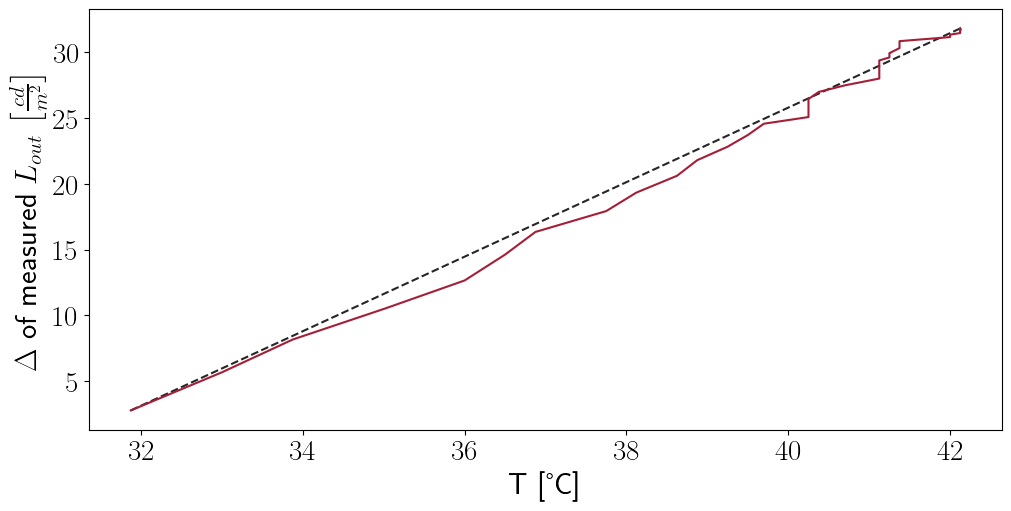

In [8]:
df_cold = mergedDataTemps[1].dataframe

max_diff = []
temp = []

for d in mergedDataTemps[2:]:
    df_warm = d.dataframe
    max_diff.append((df_cold["mean"]-df_warm["mean"]).max())
    temp.append((df_warm["temps"]).mean())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize=22
axes.plot([min(temp), max(temp)], [min(max_diff), max(max_diff)], color=Colormap.black,linestyle='--')
axes.plot(temp, max_diff, color=Colormap.map[0])

axes.set_xlabel(r'T [°C]', fontsize=fontsize)
axes.set_ylabel(r'$\Delta$ of measured $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize) 
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

figurePath = f'{baseFigurePath}/03_03Temperature/DiffLoutTemp.png'
fig.show()
fig.savefig(figurePath, dpi=300)


## Figure 4.16

In [9]:
startDate = '2023-11-19 00:00'
endDate = '2023-11-23 00:00'

path = '../data/029linearizationViewpixx3D/Test01'

path_room = f'{path}/localtemperature.log'
path_monitor = f'{path}/viewpixxII-temperature.log'
room_t = Thermometer.ReadRoomTemperature(path_room, daterange=(startDate, endDate))
room_t = room_t[room_t.temperature < 85.0]
monitor_t = Thermometer.ReadViewpixxTemperature(path_monitor, daterange=(startDate, endDate))

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx


/tmp/ipykernel_140315/3646474137.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


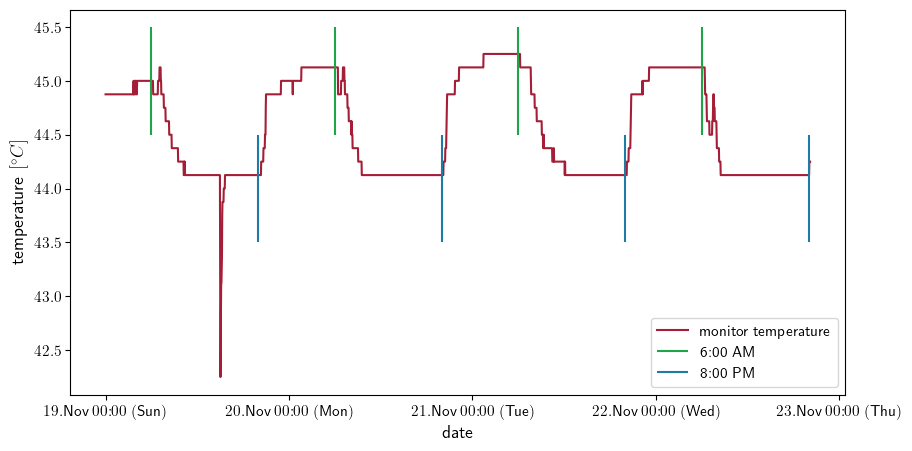

In [10]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.rcParams['text.usetex'] = True
fontsize = 13

axes.plot(monitor_t['datetime'], (monitor_t.loc[:, monitor_t.columns != 'datetime']).mean(axis=1), label='monitor temperature', color=Colormap.red)

axes.set_xlabel('date', fontsize=fontsize)
axes.set_ylabel(r'temperature $\left[^{\circ}C\right]$', fontsize=fontsize)
date_format = mdates.DateFormatter('%d.%b %H:%M (%a)')
axes.xaxis.set_major_formatter(date_format)

locator = mdates.DayLocator(interval=1)
axes.xaxis.set_major_locator(locator)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-2)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-2)

max_monitor = 45
axes.vlines(pd.to_datetime('2023-11-19 6:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.green])
axes.vlines(pd.to_datetime('2023-11-20 6:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.green])
axes.vlines(pd.to_datetime('2023-11-21 6:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.green])
axes.vlines(pd.to_datetime('2023-11-22 6:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.green], label='6:00 AM')
max_monitor = 44
axes.vlines(pd.to_datetime('2023-11-19 20:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.blue])
axes.vlines(pd.to_datetime('2023-11-20 20:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.blue])
axes.vlines(pd.to_datetime('2023-11-21 20:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.blue])
axes.vlines(pd.to_datetime('2023-11-22 20:00'), ymin=max_monitor-0.5, ymax=max_monitor+0.5, colors=[Colormap.blue], label='8:00 PM')
axes.legend(fontsize=fontsize-2)

figurePath = f'{baseFigurePath}/03_03Temperature/Temperoverview.png'
fig.show()
fig.savefig(figurePath, dpi=300)